### Libraries

In [1]:
import pandas as pd

import numpy as np


import matplotlib.pyplot as plt

import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

## ML Libraries

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sma

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, cohen_kappa_score
 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

### ***************************************************************************************************************************

### Loading the dataset with modified column names

In [3]:
org_df = pd.read_csv("cardio_train.csv", sep= ';')

org_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
org_df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
new_col_names = ['id', 'age', 'gender', 'height_cm', 'weight_kg', 
                'systolic_bp', 'diastolic_bp', 'cholesterol', 'glucose', 
                'smoking', 'alcohol consumption', 'physical_activity', 'cardiovascular disease']

old_col_names = org_df.columns

In [6]:
col_name_change_dictionary = dict()

for i in range(len(org_df.columns)):
    
    old_col_name = old_col_names[i]

    new_col_name = new_col_names[i]

    col_name_change_dictionary[old_col_name] = new_col_name

col_name_change_dictionary

{'id': 'id',
 'age': 'age',
 'gender': 'gender',
 'height': 'height_cm',
 'weight': 'weight_kg',
 'ap_hi': 'systolic_bp',
 'ap_lo': 'diastolic_bp',
 'cholesterol': 'cholesterol',
 'gluc': 'glucose',
 'smoke': 'smoking',
 'alco': 'alcohol consumption',
 'active': 'physical_activity',
 'cardio': 'cardiovascular disease'}

In [7]:
org_df.rename(columns= col_name_change_dictionary, inplace= True)

In [8]:
df = org_df

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

### Delete duplicate rows

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(70000, 13)

In [12]:
df.info()  

## Checking the dataset information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      70000 non-null  int64  
 1   age                     70000 non-null  int64  
 2   gender                  70000 non-null  int64  
 3   height_cm               70000 non-null  int64  
 4   weight_kg               70000 non-null  float64
 5   systolic_bp             70000 non-null  int64  
 6   diastolic_bp            70000 non-null  int64  
 7   cholesterol             70000 non-null  int64  
 8   glucose                 70000 non-null  int64  
 9   smoking                 70000 non-null  int64  
 10  alcohol consumption     70000 non-null  int64  
 11  physical_activity       70000 non-null  int64  
 12  cardiovascular disease  70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


### ***************************************************************************************************************************
### ***************************************************************************************************************************

## Dataset Information

Features:

1.  Age | Objective Feature | age | int (days)

2.  Height | Objective Feature | height | int (cm) |

3.  Weight | Objective Feature | weight | float (kg) |

4.  Gender | Objective Feature | gender | categorical code |

5.  Systolic blood pressure | Examination Feature | ap_hi | int |

6.  Diastolic blood pressure | Examination Feature | ap_lo | int |

7.  Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

8.  Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

9.  Smoking | Subjective Feature | smoke | binary |

10. Alcohol intake | Subjective Feature | alco | binary |

11. Physical activity | Subjective Feature | active | binary |

12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

### DATASET LINK


https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

### ***************************************************************************************************************************
### ***************************************************************************************************************************

## Checking the columns one by one

#### We already all column are good and there is no null values

### Values of columns are in days format, hence we need to convert it into year format

In [13]:
df['age'] = np.floor(df['age'] / 365)

## Since we convert age in years we used floor as we generaly say xyz years old

In [14]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.0,1,156,56.0,100,60,1,1,0,0,0,0


### Checking value counts of the Categorical Column

In [15]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [16]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [17]:
df["glucose"].value_counts()

1    59479
3     5331
2     5190
Name: glucose, dtype: int64

In [18]:
df['smoking'].value_counts()

0    63831
1     6169
Name: smoking, dtype: int64

In [19]:
df['alcohol consumption'].value_counts()

0    66236
1     3764
Name: alcohol consumption, dtype: int64

In [20]:
df['physical_activity'].value_counts()

1    56261
0    13739
Name: physical_activity, dtype: int64

## Converting to readable form

In [21]:
df['gender'] = df['gender'].replace({2 : "M", 1 : "F"})

df['cholesterol'] = df['cholesterol'].replace({1: "normal", 2: "above normal", 3: "well above normal"})

df["glucose"] = df['glucose'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'})

df['smoking'] = df['smoking'].replace({0: "Non Smoker", 1: "Smoker"})

df['alcohol consumption'] = df['alcohol consumption'].replace({0: "Non Alcoholic", 1: "Alcoholic"})

df['physical_activity'] = df['physical_activity'].replace({0: "Not Active", 1: "Active"})

df['cardiovascular disease'] = df['cardiovascular disease'].replace({0: "No CVD", 1: "CVD"})

In [22]:
df['cholesterol'] = df['cholesterol'].astype('category')
df['glucose'] = df['glucose'].astype('category')
df['smoking'] = df['smoking'].astype('category')
df['alcohol consumption'] = df['alcohol consumption'].astype('category')
df['physical_activity'] = df['physical_activity'].astype('category')
df['cardiovascular disease'] = df['cardiovascular disease'].astype('category')
df['gender'] = df['gender'].astype('category')

In [23]:
df.dtypes

id                           int64
age                        float64
gender                    category
height_cm                    int64
weight_kg                  float64
systolic_bp                  int64
diastolic_bp                 int64
cholesterol               category
glucose                   category
smoking                   category
alcohol consumption       category
physical_activity         category
cardiovascular disease    category
dtype: object

df['age'] = df['age'].astype('int64')

df.head()

### ***************************************************************************************************************************
### ***************************************************************************************************************************

### Checking Data Information

In [24]:
df.describe()

,id,age,height_cm,weight_kg,systolic_bp,diastolic_bp
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000


## EDA Analysis

In [25]:
data_for_plot = df[['age', 'height_cm', 'weight_kg', 'systolic_bp', 'diastolic_bp']]

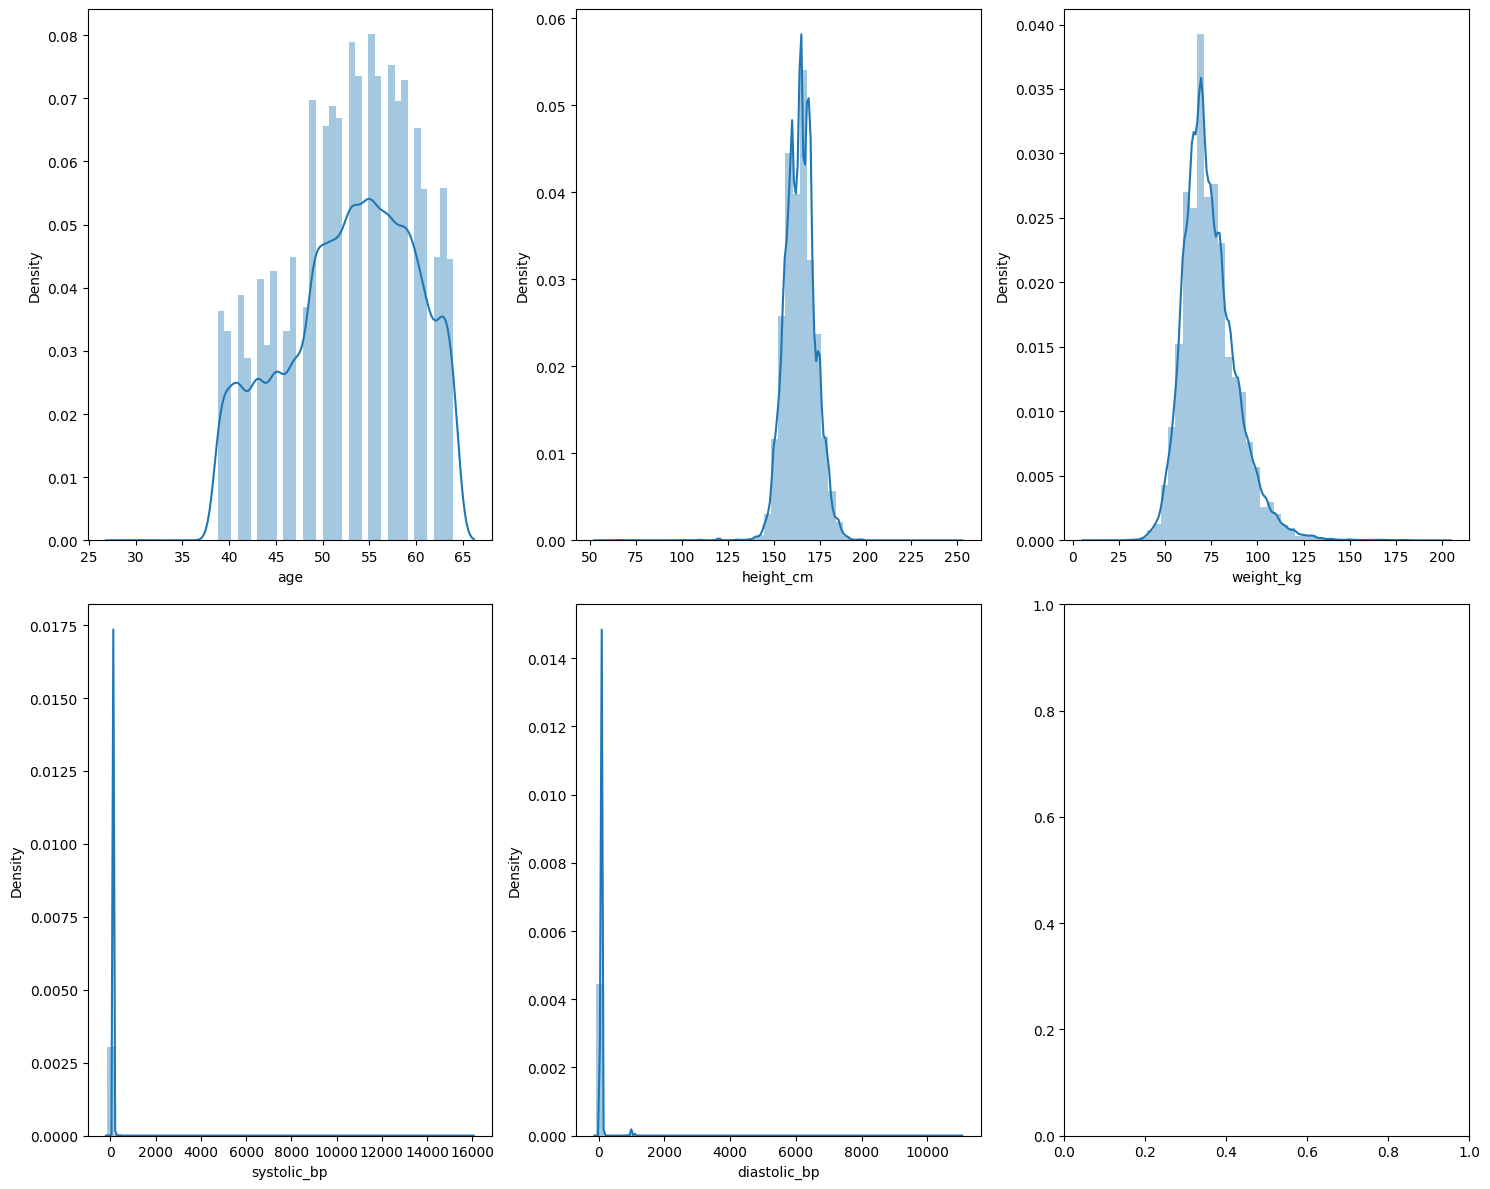

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(15,12))

# Iterate through data and subplot positions
sns.distplot(data_for_plot['age'], ax= axes[0, 0])
sns.distplot(data_for_plot['height_cm'], ax= axes[0, 1])
sns.distplot(data_for_plot['weight_kg'], ax= axes[0, 2])
sns.distplot(data_for_plot['systolic_bp'], ax= axes[1, 0])
sns.distplot(data_for_plot['diastolic_bp'], ax= axes[1, 1])

plt.tight_layout()

plt.show()



### Age vs CVD

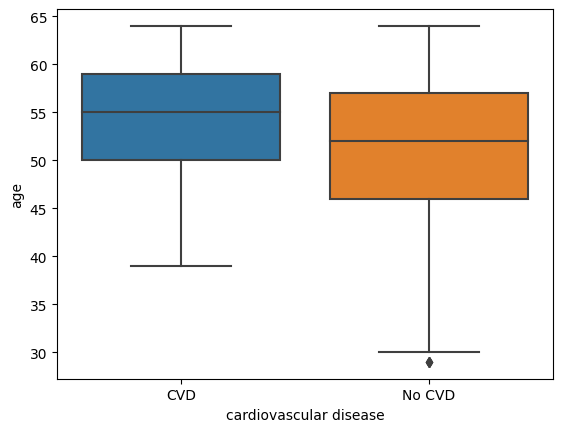

In [27]:
sns.boxplot(data= df, x= 'cardiovascular disease', y= 'age')

plt.show()


### Comparing the two categorical variables "Gender", "CVD Disease"

In [28]:
df2 = pd.crosstab(index=df['gender'], columns=df['cardiovascular disease'])

df2

cardiovascular disease,CVD,No CVD
gender,,
F,22616,22914
M,12363,12107


<Figure size 800x600 with 0 Axes>

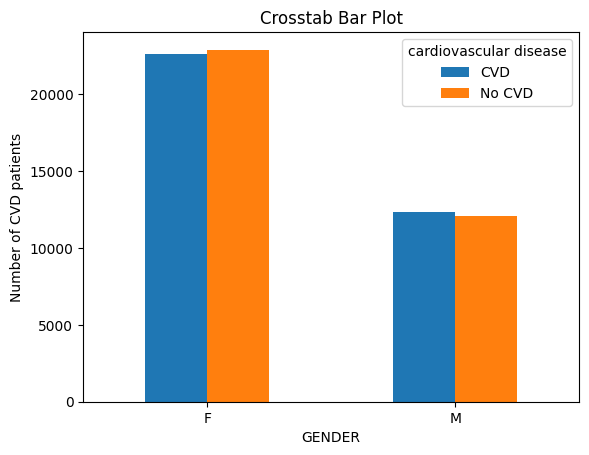

In [29]:
plt.figure(figsize=(8, 6))
df2.plot(kind='bar', legend=True)
plt.title('Crosstab Bar Plot')
plt.xlabel('GENDER')
plt.ylabel('Number of CVD patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

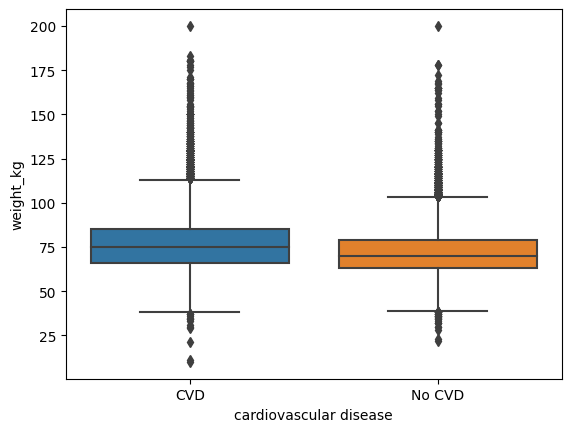

In [30]:
sns.boxplot(data= df, x= 'cardiovascular disease', y= 'weight_kg')

plt.show()


#### We see the outliers in the weight data

In [31]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
0,0,50.0,M,168,62.0,110,80,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD
1,1,55.0,F,156,85.0,140,90,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD
2,2,51.0,F,165,64.0,130,70,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
3,3,48.0,M,169,82.0,150,100,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
4,4,47.0,F,156,56.0,100,60,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD


### Comparing the two categorical variables "Glucose", "CVD Disease"

In [32]:
df3 = pd.crosstab(index=df['glucose'], columns=df['cardiovascular disease'])

df3

cardiovascular disease,CVD,No CVD
glucose,,
above normal,3078,2112
normal,28585,30894
well above normal,3316,2015


<Figure size 800x600 with 0 Axes>

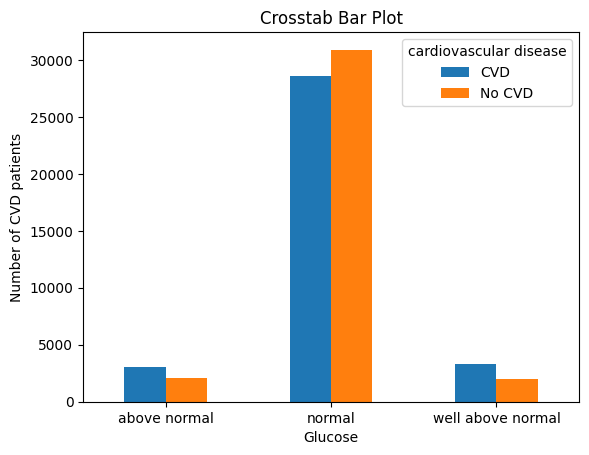

In [33]:
plt.figure(figsize=(8, 6))
df3.plot(kind='bar', legend=True)
plt.title('Crosstab Bar Plot')
plt.xlabel('Glucose')
plt.ylabel('Number of CVD patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

In [34]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
0,0,50.0,M,168,62.0,110,80,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD
1,1,55.0,F,156,85.0,140,90,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD
2,2,51.0,F,165,64.0,130,70,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
3,3,48.0,M,169,82.0,150,100,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
4,4,47.0,F,156,56.0,100,60,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD


### Comparing the two categorical variables "Glucose", "CVD Disease"

In [35]:
df4 = pd.crosstab(index=df['smoking'], columns=df['cardiovascular disease'])

df4

cardiovascular disease,CVD,No CVD
smoking,,
Non Smoker,32050,31781
Smoker,2929,3240


<Figure size 800x600 with 0 Axes>

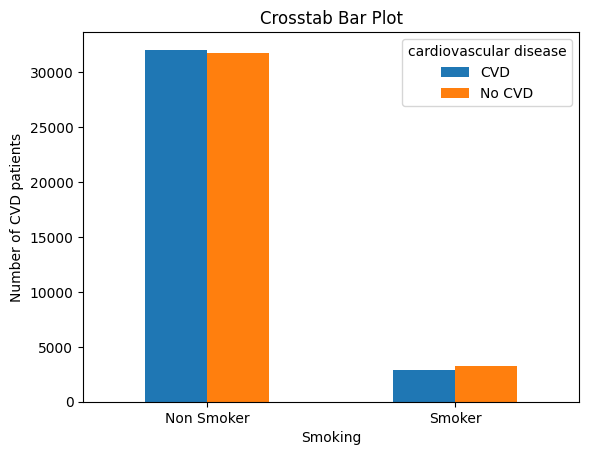

In [36]:
plt.figure(figsize=(8, 6))
df4.plot(kind='bar', legend=True)
plt.title('Crosstab Bar Plot')
plt.xlabel('Smoking')
plt.ylabel('Number of CVD patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

*******************************************************************************************************************************************

In [37]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
0,0,50.0,M,168,62.0,110,80,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD
1,1,55.0,F,156,85.0,140,90,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD
2,2,51.0,F,165,64.0,130,70,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
3,3,48.0,M,169,82.0,150,100,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
4,4,47.0,F,156,56.0,100,60,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD


### Comparing the two categorical variables "Physical Activity", "CVD Disease"

In [38]:
df5 = pd.crosstab(index=df['physical_activity'], columns=df['cardiovascular disease'])

df5

cardiovascular disease,CVD,No CVD
physical_activity,,
Active,27618,28643
Not Active,7361,6378


<Figure size 800x600 with 0 Axes>

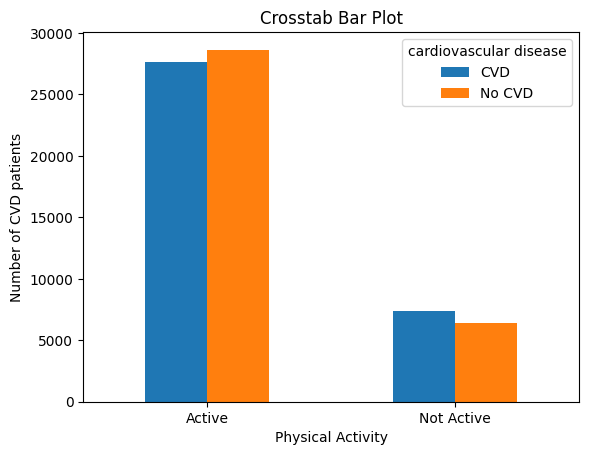

In [39]:
plt.figure(figsize=(8, 6))
df5.plot(kind='bar', legend=True)
plt.title('Crosstab Bar Plot')
plt.xlabel('Physical Activity')
plt.ylabel('Number of CVD patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

************************************************************************************************************************************************
************************************************************************************************************************************************
************************************************************************************************************************************************

*************************************************************************************************************************************************
*************************************************************************************************************************************************
**********************************************************************************************************************************************

## TRIAL AND ERROR

In [40]:
df[df['systolic_bp'] > 200]['systolic_bp'].value_counts().sum()



100

In [41]:
df[df['diastolic_bp'] >120]['diastolic_bp'].value_counts().sum()

## in actual world 110-120 is the upper range limit for diastolic BP 

1056

<AxesSubplot: xlabel='systolic_bp', ylabel='Density'>

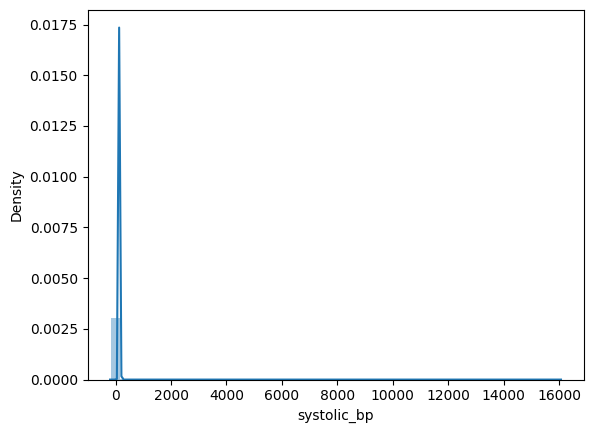

In [42]:
sns.distplot(df['systolic_bp'])

<AxesSubplot: xlabel='diastolic_bp', ylabel='Density'>

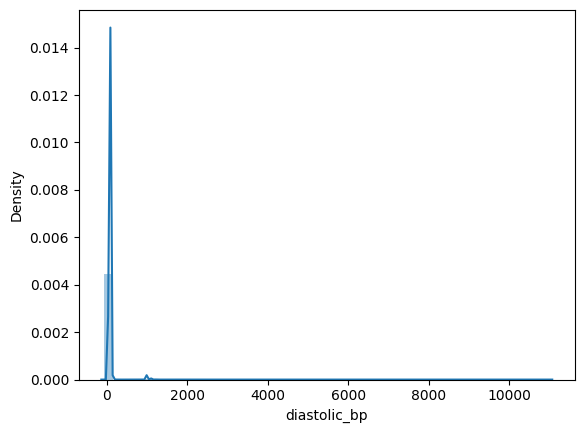

In [43]:
sns.distplot(df['diastolic_bp'])

## While researching on the domain knowldege we realized that in general systolic value must be greater than diastolic

In [44]:
df[df['systolic_bp']<df['diastolic_bp']]

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
228,314,47.0,M,183,98.0,160,1100,normal,above normal,Smoker,Non Alcoholic,Active,CVD
241,334,60.0,M,157,60.0,160,1000,above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
260,357,49.0,F,150,83.0,140,800,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
329,458,64.0,F,176,63.0,160,1000,above normal,above normal,Non Smoker,Non Alcoholic,Not Active,CVD
345,482,51.0,F,154,81.0,140,1000,above normal,normal,Non Smoker,Non Alcoholic,Active,CVD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,63.0,F,167,81.0,160,1000,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
69872,99798,59.0,F,152,56.0,160,1000,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
69878,99807,58.0,M,168,95.0,160,1000,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
69885,99816,61.0,M,166,78.0,170,1000,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD


In [45]:
df[df['systolic_bp']<df['diastolic_bp']].shape

(1234, 13)

In [46]:
df['diastolic_bp'].isna().sum()

0

In [47]:
import pandas as pd

# Assuming you have already created the DataFrame 'df'

# Create a condition to filter rows where diastolic_bp > systolic_bp
condition = df['diastolic_bp'] > df['systolic_bp']

# Apply the division operation to the selected rows
df.loc[condition, 'diastolic_bp'] = df.loc[condition, 'diastolic_bp'] / 10


In [48]:
df['diastolic_bp'].isna().sum()

0

In [49]:
df[df['id'].isin([314, 334, 357])]

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
228,314,47.0,M,183,98.0,160,110.0,normal,above normal,Smoker,Non Alcoholic,Active,CVD
241,334,60.0,M,157,60.0,160,100.0,above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
260,357,49.0,F,150,83.0,140,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD


<AxesSubplot: xlabel='diastolic_bp', ylabel='Density'>

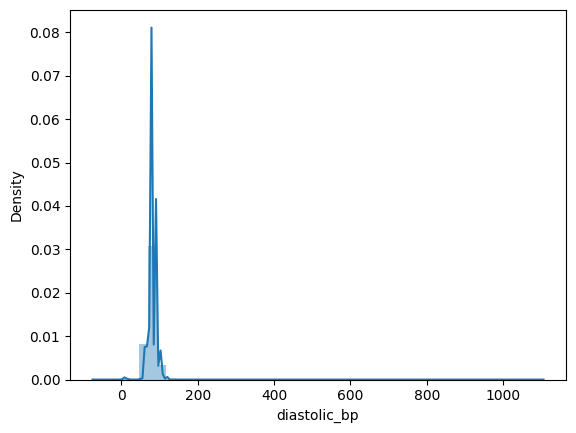

In [50]:
sns.distplot(df['diastolic_bp'])

# Systolic

### Systolic BP upper critical range is (180 - 200). 

In [51]:
df[df['systolic_bp'] > 200]['systolic_bp'].value_counts().sort_index()

# we will take the values > 200 to 240 as exteme outliers

202       1
207       1
210      24
215       2
220      24
230       1
240       7
309       1
401       1
701       1
806       1
902       1
906       6
907       3
909       1
960       1
1110      1
1130      1
1202      1
1205      1
1300      2
1400      3
1409      1
1420      2
1500      1
1620      1
2000      1
11020     1
11500     1
13010     2
14020     4
16020     1
Name: systolic_bp, dtype: int64

### We will take the values > 200 to 240 as exteme outliers

In [52]:
(df[df['systolic_bp']>240].value_counts().sum() / df['systolic_bp'].value_counts().sum()) * 100

0.05714285714285715

### And the lower critical range for Systolic BP is (70 - 80).

In [53]:
df[df['systolic_bp'] < 70]['systolic_bp'].value_counts().sort_index()

## here values upto 60 will be counted as extreme outliers

-150     1
-140     1
-120     2
-115     1
-100     2
 1       2
 7       1
 10      7
 11     28
 12     76
 13     15
 14     29
 15     12
 16      3
 17      3
 20      4
 24      1
 60      1
Name: systolic_bp, dtype: int64

### Here values upto 60 will be counted as extreme outliers

In [54]:
(df[df['systolic_bp'] < 60].value_counts().sum() / df['systolic_bp'].value_counts().sum()) * 100

0.26857142857142857

### Counts of "systolic_bp"

In [55]:
systolic_outlier =df[(df['systolic_bp'] < 60) | (df['systolic_bp'] > 240) ]['systolic_bp'].value_counts().sum()

print(systolic_outlier)

228


# Diastolic

### The upper critical range for DIASTOLIC BP is (110 - 120).

In [56]:
df[df['diastolic_bp'] > 120]['diastolic_bp'].value_counts().sort_index()

## values from 121-140 will be counted as extreme outliers

121.0      1
121.1      1
122.0      1
125.0      1
126.0      2
130.0     19
140.0     16
150.0      2
160.0      2
170.0      1
180.0      1
182.0      1
190.0      2
208.8      1
570.0      2
680.0      1
709.9      1
710.0      1
800.0      2
804.4      1
807.7      1
807.9      1
809.9      3
810.0      1
820.0      1
850.0      1
901.1      2
910.0      1
980.0      1
1000.0     3
1100.0     1
Name: diastolic_bp, dtype: int64

### Values from 121-140 will be counted as extreme outliers

In [57]:
(df[df['diastolic_bp']>140].value_counts().sum() / df['diastolic_bp'].value_counts().sum()) * 100

0.04857142857142857

### The lower critical range for DIASTOLIC BP is (50 - 60).

In [58]:
df[df['diastolic_bp'] < 50]['diastolic_bp'].value_counts().sort_index()

## values from 40-49 will be counted as extreme outliers

-70.0     1
 0.0     21
 1.0      1
 4.0      1
 6.0      8
 7.0     27
 7.1      1
 7.5      1
 8.0     98
 9.0     39
 9.5      1
 10.0    16
 10.5     1
 11.0    13
 12.0    31
 12.5     1
 13.0    16
 13.5     1
 14.0    17
 15.0     7
 16.0     7
 17.0     5
 18.0     3
 19.0     2
 20.0    15
 30.0     6
 40.0    16
 45.0     2
 49.0     2
Name: diastolic_bp, dtype: int64

### Values from 40-49 will be counted as extreme outliers

In [59]:
(df[df['diastolic_bp']<40].value_counts().sum() / df['diastolic_bp'].value_counts().sum()) * 100

0.48571428571428565

### Counts of "diastolic_bp" 

In [60]:
diastolic_outlier = df[(df['diastolic_bp'] < 40) | (df['diastolic_bp'] > 140) ]['diastolic_bp'].value_counts().sum()

diastolic_outlier 


374

### Percentage of outliers due to blood pressure

In [61]:
((systolic_outlier + diastolic_outlier ) / df.shape[0]) * 100

0.86

### Since it is less than 1%, we can delete this data

******************************************************************************************************************************************************

In [62]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD


## Checking outliers in "height_cm"

<AxesSubplot: >

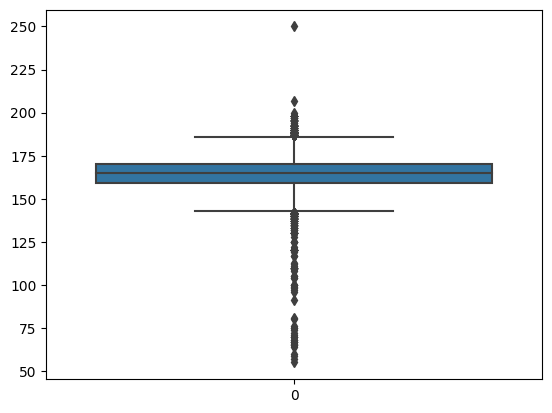

In [63]:
sns.boxplot(df['height_cm'])

## Treatment of outliers in "Height_cm"

In [64]:
df[df['height_cm']>200].value_counts().sum()

2

In [65]:
df['height_cm'] = df['height_cm'].apply(lambda x: 200 if x > 200 else x)


In [66]:
## height_cm in 200 cm = 6.5 feet
## There was only 2 data above 200 cm so we treated that outliers and changed the value to 200 cm

In [67]:
df[df['height_cm']>200].value_counts().sum()

0

In [68]:
df[df['height_cm'] < 125].value_counts().sum()

87

In [69]:
# we are not sure about the lower height range, so we are not treating this outliers

******************************************************************************************************************************************************

******************************************************************************************************************************************************

## Checking Outliers in "age"

<AxesSubplot: >

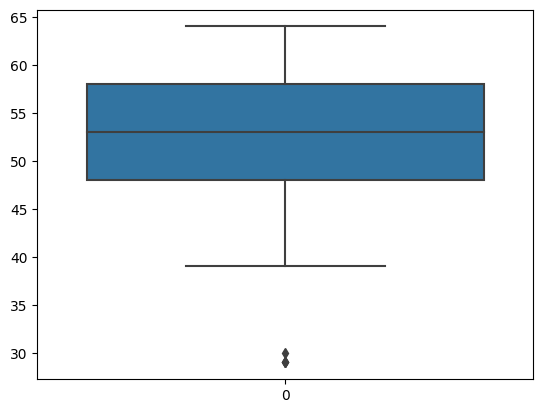

In [70]:
sns.boxplot(df['age'])

<AxesSubplot: xlabel='age', ylabel='Density'>

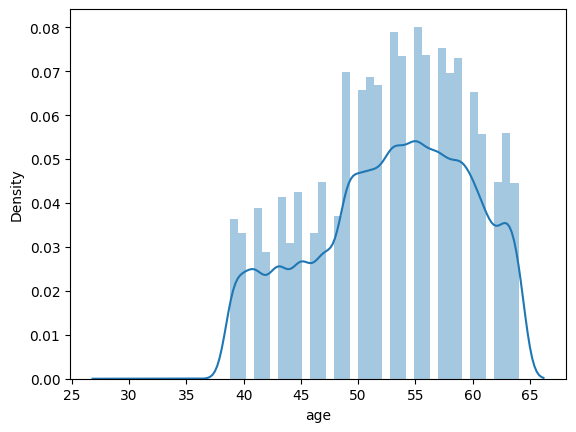

In [71]:
sns.distplot(df['age'])

******************************************************************************************************************************************************

******************************************************************************************************************************************************

## Calculating BMI

The Body Mass Index (BMI) is a numerical value of a person's weight in relation to their height. It's often used as a simple way to assess whether an individual has a healthy body weight for a given height. The BMI is calculated using the following formula:

BMI = weight (kg) / (height (m) * height (m))

In this formula:

"weight" is the person's weight in kilograms.
"height" is the person's height in meters.

In [72]:
df['BMI'] = round((df['weight_kg']*10000) / (df['height_cm'])**2,2)

In [73]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01


#### "Underweight: BMI < 18.5
#### Normal weight: BMI 18.5 - 24.9
#### Overweight: BMI 25 - 29.9
#### Obesity Class I: BMI 30 - 34.9
#### Obesity Class II: BMI 35 - 39.9
#### Obesity Class III: BMI ≥ 40"

#### Using above condition we created a new column "BMI_status" to know the status of an individual

def BMI_status_update(bmi):
    if bmi < 18.5:
        return "Underweight"
    
    elif (bmi >= 18.5) and (bmi < 25):
        return "Normal_weight"
    
    elif  (bmi >= 25) and (bmi < 30):
        return "Overweight"
    
    elif  (bmi >= 30) and (bmi < 35):
        return "Obesity_class_1"
    
    elif  (bmi >= 35) and (bmi < 40):
        return "Obesity_class_2"
    
    elif  bmi >= 40 :
        return "Obesity_class_3"
    
    

In [74]:
def BMI_status_update(bmi):
    if bmi < 18.5:
        return "Underweight"
    
    elif (bmi >= 18.5) and (bmi < 25):
        return "Normal_weight"
    
    elif  bmi >= 25:
        return "Overweight"
    
    

In [75]:
df['BMI_status'] = df["BMI"].apply(BMI_status_update)

In [76]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97,Normal_weight
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93,Overweight
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51,Normal_weight
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71,Overweight
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01,Normal_weight


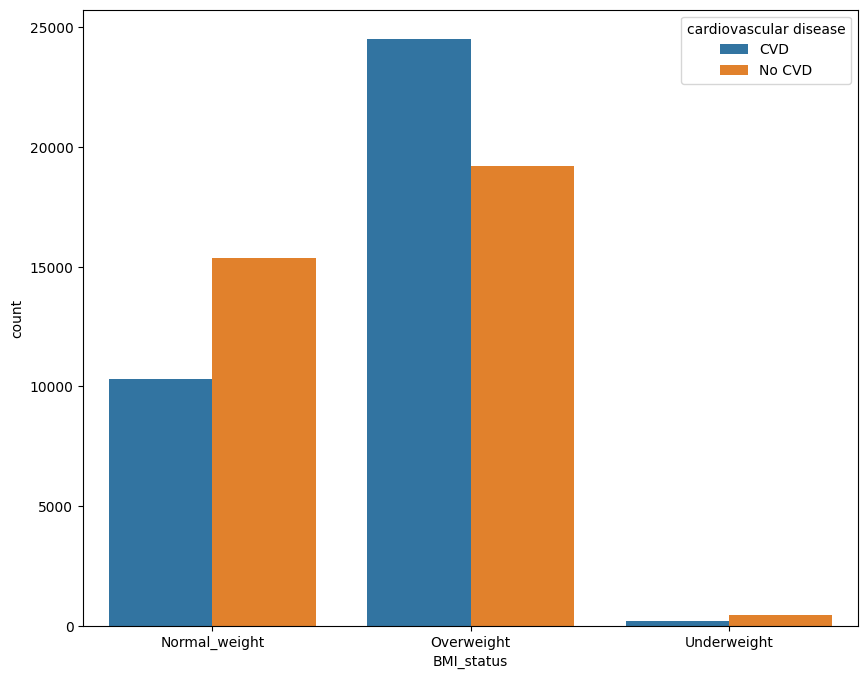

In [77]:
plt.figure(figsize = (10,8))
sns.countplot(data = df, x = 'BMI_status', hue = 'cardiovascular disease')
plt.show()

*************************************************************************************************************************************************


******************************************************************************************************************************************************

In [78]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97,Normal_weight
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93,Overweight
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51,Normal_weight
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71,Overweight
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01,Normal_weight


*************************************************************************************************************************************************

*************************************************************************************************************************************************

*************************************************************************************************************************************************

*************************************************************************************************************************************************

# STATISTICS

In [79]:
from scipy import stats

## CHI_SQUARE

##### Null Hypothesis (H0): There is no association or independence between the two categorical variables. In other words, the distribution of one categorical variable is independent of the distribution of the other categorical variable.


##### Alternative Hpothesis (Ha or H1): There is an association or dependence between the two categorical variables. The distribution of one categorical variable is not independent of the distribution of the other categorical variable.

In [80]:
df.dtypes

id                           int64
age                        float64
gender                    category
height_cm                    int64
weight_kg                  float64
systolic_bp                  int64
diastolic_bp               float64
cholesterol               category
glucose                   category
smoking                   category
alcohol consumption       category
physical_activity         category
cardiovascular disease    category
BMI                        float64
BMI_status                  object
dtype: object

In [81]:
categorical_columns = ['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol consumption', 'physical_activity', 'BMI_status']


for i in categorical_columns:

    contigency_table = pd.crosstab(index=df['cardiovascular disease'], columns=df[i])

    chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

    if p <= 0.05:
        print(f'We reject the null hypothesis, hence "{i}" column is important.\n')
    else:
        print(f'We failed to reject the null hypothesis, hence "{i}" column is not important.\n')

We reject the null hypothesis, hence "gender" column is important.

We reject the null hypothesis, hence "cholesterol" column is important.

We reject the null hypothesis, hence "glucose" column is important.

We reject the null hypothesis, hence "smoking" column is important.

We failed to reject the null hypothesis, hence "alcohol consumption" column is not important.

We reject the null hypothesis, hence "physical_activity" column is important.

We reject the null hypothesis, hence "BMI_status" column is important.



# ANOVA (Analysis of Variance):


#### ANOVA is used to compare means across multiple groups, typically when you have a categorical independent variable and a numerical dependent variable.

#### Null Hypothesis (H0): There is no significant difference in the means of the groups being compared.

#### ANOVA for weight vs glucose

In [82]:
df['glucose'].value_counts()

normal               59479
well above normal     5331
above normal          5190
Name: glucose, dtype: int64

In [83]:
no = df[df['glucose'] == 'normal']['weight_kg']   # no = normal

w_a_no = df[df['glucose'] == 'well above normal']['weight_kg']   # w_a_no = well above normal

a_no = df[df['glucose'] == 'above normal']['weight_kg']   # a_no = above normal



In [84]:
f_stat, p_value = stats.f_oneway(no, a_no, w_a_no)

p_value

2.8703019290565403e-228

#### we reject null hypothesis, there is significant difference in mean of weight across the various glucose level

********************************************************************************************************************************************

********************************************************************************************************************************************

********************************************************************************************************************************************

# DOMAIN KNOWLEDGE FOR BLOOD PRESSURE

##### Diastolic   40-50
##### Diastolic  120 - 130    # worst cases


##### max patient lies in range Diastolic 90-100

********************************************************************************************************************************************


##### systolic    180-200
##### systolic     60-70   # worst cases


##### max patient lies in range Systolic   140-160


********************************************************************************************************************************************


###  diastolic    --------    systolic

##### 80-90       --------    120-130       Normal

##### 90-100      --------    130-140       prehypertensive (# concerned issue)

##### 90-95       --------       >150       hypertensive

##### >100        --------       >180-200   prone to cvd

#####             --------     60-70      

********************************************************************************************************************************************

********************************************************************************************************************************************

# DIASTOLIC BP TREATMENT

In [85]:
df[(df['diastolic_bp'] < 40) | (df['diastolic_bp'] > 130)]['diastolic_bp'].value_counts().sum()

390

#### we need to treat 390 values

In [86]:
df.loc[(df['diastolic_bp'] < 40), 'diastolic_bp'] = 40

## treating the lower range value for diastolic

In [87]:
df.loc[(df['diastolic_bp'] > 130), 'diastolic_bp'] = 130

## treating the upper range value for diastolic

In [88]:
df[(df['diastolic_bp'] < 40) | (df['diastolic_bp'] > 130)]['diastolic_bp'].value_counts().sum()

0

<AxesSubplot: xlabel='diastolic_bp', ylabel='Density'>

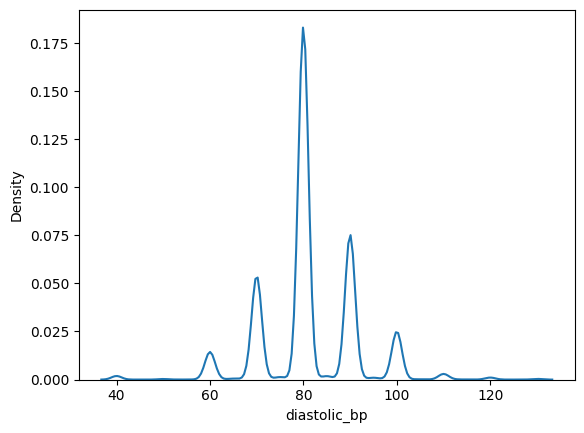

In [89]:
sns.kdeplot(df['diastolic_bp'])

********************************************************************************************************************************************

********************************************************************************************************************************************

# SYSTOLIC BP TREATMENT

In [90]:
df[(df['systolic_bp'] < 60) | (df['systolic_bp'] > 200)]['systolic_bp'].value_counts().sum()

288

#### we need to treat 288 values

In [91]:
df.loc[(df['systolic_bp'] < 60), 'systolic_bp'] = 60
                                                ###### treating the lower range value for systolic


df.loc[(df['systolic_bp'] > 200), 'systolic_bp'] = 200
                                                ###### treating the upper range value for systolic

In [92]:
df[(df['systolic_bp'] < 60) | (df['systolic_bp'] > 200)]['systolic_bp'].value_counts().sum()

0

<AxesSubplot: xlabel='systolic_bp', ylabel='Density'>

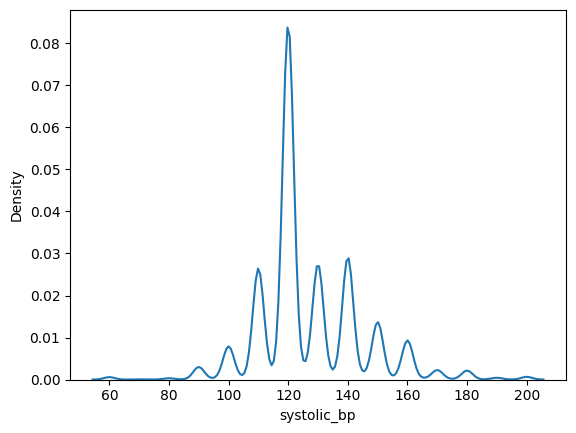

In [93]:
sns.kdeplot(df['systolic_bp'])

********************************************************************************************************************************************

********************************************************************************************************************************************

In [94]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97,Normal_weight
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93,Overweight
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51,Normal_weight
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71,Overweight
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01,Normal_weight


In [95]:
df['height_in_foot'] = round((df['height_cm'] * 0.0328084), 2)
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status,height_in_foot
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97,Normal_weight,5.51
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93,Overweight,5.12
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51,Normal_weight,5.41
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71,Overweight,5.54
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01,Normal_weight,5.12


********************************************************************************************************************************************

********************************************************************************************************************************************

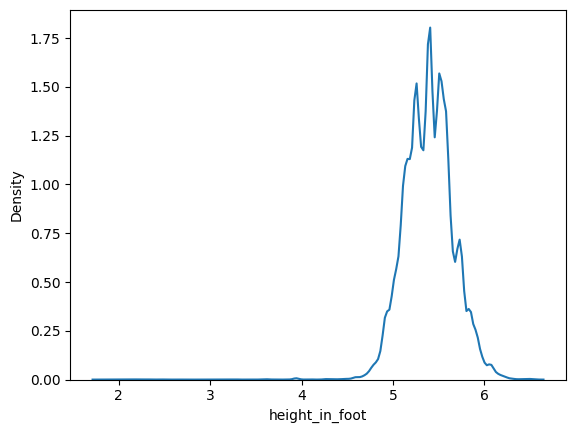

In [96]:
sns.kdeplot(df['height_in_foot'])

plt.show()

<AxesSubplot: xlabel='cardiovascular disease', ylabel='age'>

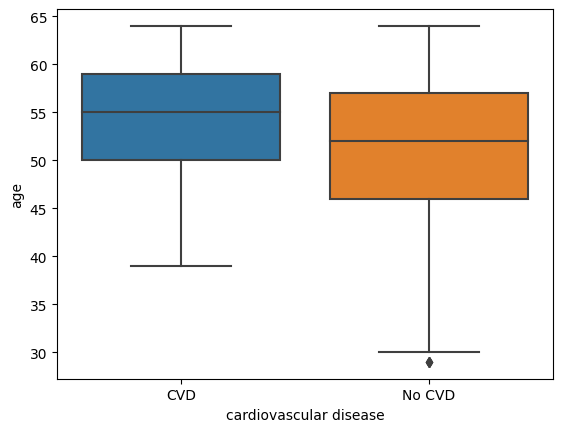

In [97]:
sns.boxplot(x = df['cardiovascular disease'], y=df['age'])

<AxesSubplot: xlabel='height_in_foot', ylabel='Density'>

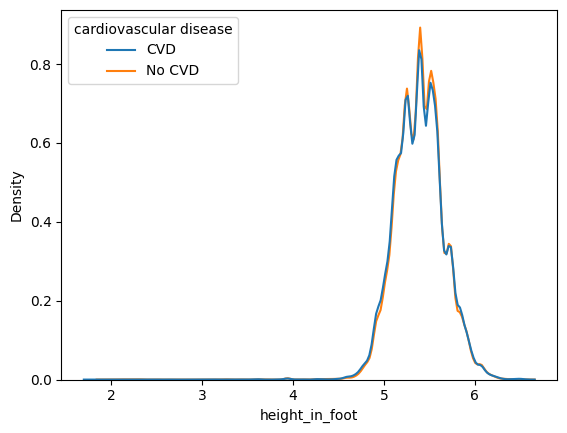

In [98]:
sns.kdeplot(x=df['height_in_foot'], hue=df['cardiovascular disease'])

<AxesSubplot: xlabel='weight_kg', ylabel='Density'>

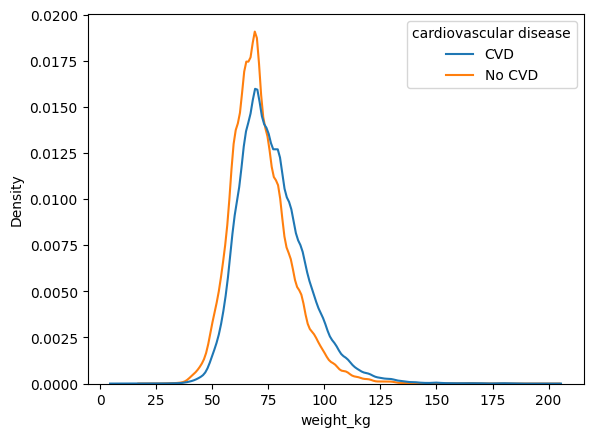

In [99]:
sns.kdeplot(x=df['weight_kg'], hue=df['cardiovascular disease'])

<AxesSubplot: xlabel='systolic_bp', ylabel='Density'>

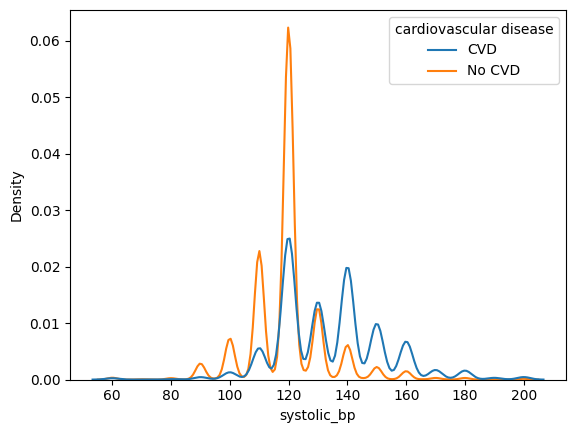

In [100]:
sns.kdeplot(x=df['systolic_bp'], hue=df['cardiovascular disease'])

<AxesSubplot: xlabel='diastolic_bp', ylabel='Density'>

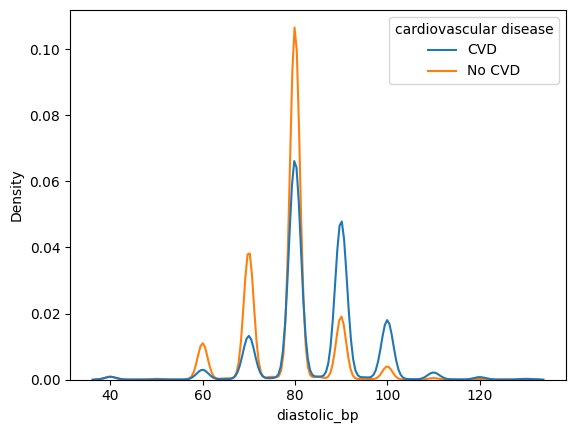

In [101]:
sns.kdeplot(x=df['diastolic_bp'], hue=df['cardiovascular disease'])

************************************************************************************************************************

************************************************************************************************************************

## ANOVA for Age vs CVD

#### Null Hypothesis (H0): There is no significant difference in the means of the groups being compared.

In [102]:
df['cardiovascular disease'].value_counts()

No CVD    35021
CVD       34979
Name: cardiovascular disease, dtype: int64

In [103]:
age_vs_cvd = df[df['cardiovascular disease'] == 'CVD']['age']

age_vs_no_cvd = df[df['cardiovascular disease'] == 'No CVD']['age'] 

In [104]:
f_stat, p_value = stats.f_oneway(age_vs_cvd, age_vs_no_cvd)

p_value

0.0

### We reject the null hypothesis due to lower p_value.... We found out that mean of age for CVD is different than Non CVD members

************************************************************************************************************************


************************************************************************************************************************

### Converting the BMI_status from object type to category 

In [105]:
df['BMI_status'] = df['BMI_status'].astype('category')

In [106]:
df.dtypes

id                           int64
age                        float64
gender                    category
height_cm                    int64
weight_kg                  float64
systolic_bp                  int64
diastolic_bp               float64
cholesterol               category
glucose                   category
smoking                   category
alcohol consumption       category
physical_activity         category
cardiovascular disease    category
BMI                        float64
BMI_status                category
height_in_foot             float64
dtype: object

************************************************************************************************************************


************************************************************************************************************************

## Systolic must be always greater than diastolic

In [107]:
df[df['systolic_bp']<= df['diastolic_bp']]

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status,height_in_foot
6653,9482,53.0,F,162,69.0,130,130.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,26.29,Overweight,5.31
8757,12494,46.0,M,163,63.0,60,130.0,normal,normal,Smoker,Non Alcoholic,Active,No CVD,23.71,Normal_weight,5.35
9165,13066,52.0,F,165,71.0,120,130.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,26.08,Overweight,5.41
12086,17260,58.0,M,169,78.0,130,130.0,normal,normal,Smoker,Alcoholic,Active,CVD,27.31,Overweight,5.54
12785,18238,43.0,M,178,105.0,100,100.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,33.14,Overweight,5.84
15990,22832,39.0,M,179,70.0,120,130.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.85,Normal_weight,5.87
23230,33191,54.0,M,170,70.0,112,130.0,normal,above normal,Non Smoker,Non Alcoholic,Active,CVD,24.22,Normal_weight,5.58
23502,33580,54.0,M,169,64.0,120,130.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,22.41,Normal_weight,5.54
32190,45975,63.0,F,162,120.0,100,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,45.72,Overweight,5.31
37552,53614,41.0,M,182,63.0,120,130.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,19.02,Normal_weight,5.97


In [108]:
df[df['systolic_bp']<= df['diastolic_bp']].value_counts().sum()

19

In [109]:
val_to_be_dropped = df[df['systolic_bp']<= df['diastolic_bp']].index.to_list()
val_to_be_dropped

[6653,
 8757,
 9165,
 12086,
 12785,
 15990,
 23230,
 23502,
 32190,
 37552,
 38024,
 40454,
 42334,
 43434,
 44042,
 52912,
 55291,
 63121,
 67162]

### Droping the above where systolic is less than or equal to diastolic

In [110]:
df.drop(val_to_be_dropped, axis='index', inplace=True)
df.shape

(69981, 16)

************************************************************************************************************************


************************************************************************************************************************

************************************************************************************************************************


************************************************************************************************************************

In [111]:
df.head()

,id,age,gender,height_cm,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status,height_in_foot
0,0,50.0,M,168,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,No CVD,21.97,Normal_weight,5.51
1,1,55.0,F,156,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,CVD,34.93,Overweight,5.12
2,2,51.0,F,165,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,CVD,23.51,Normal_weight,5.41
3,3,48.0,M,169,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,CVD,28.71,Overweight,5.54
4,4,47.0,F,156,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,No CVD,23.01,Normal_weight,5.12


In [112]:
df.columns

Index(['id', 'age', 'gender', 'height_cm', 'weight_kg', 'systolic_bp',
       'diastolic_bp', 'cholesterol', 'glucose', 'smoking',
       'alcohol consumption', 'physical_activity', 'cardiovascular disease',
       'BMI', 'BMI_status', 'height_in_foot'],
      dtype='object')

### Check where bmi status = overweight and height is less

In [113]:
ow_data_check = df[(df['BMI_status'] == 'Overweight') & (df['height_in_foot'] <= 3)][['id', 'age', 'gender', 'height_in_foot', 'weight_kg']]

<AxesSubplot: xlabel='height_in_foot', ylabel='weight_kg'>

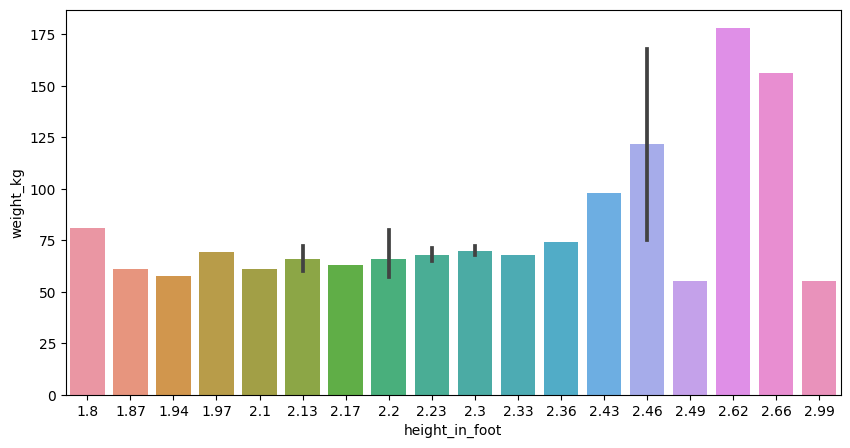

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(data= ow_data_check, x='height_in_foot', y='weight_kg')

### dropping the data since we see abnormalities

In [115]:
ow_data_drop = ow_data_check.index.to_list()
df.drop(ow_data_drop, axis=0, inplace=True)

************************************************************************************************************************


************************************************************************************************************************

************************************************************************************************************************


************************************************************************************************************************

### Preparing Data for Base Model

#### delete height in cm and id column

### CHANGES ARE TO BE DONE HERE !!!!

In [116]:
ML_model_data = df.drop(['id', 'height_cm'], axis=1)

In [117]:
ML_model_data['cardiovascular disease'].replace({"No CVD" : 0, "CVD" : 1}, inplace=True)

In [118]:
ML_model_data.head()

,age,gender,weight_kg,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,BMI_status,height_in_foot
0,50.0,M,62.0,110,80.0,normal,normal,Non Smoker,Non Alcoholic,Active,0,21.97,Normal_weight,5.51
1,55.0,F,85.0,140,90.0,well above normal,normal,Non Smoker,Non Alcoholic,Active,1,34.93,Overweight,5.12
2,51.0,F,64.0,130,70.0,well above normal,normal,Non Smoker,Non Alcoholic,Not Active,1,23.51,Normal_weight,5.41
3,48.0,M,82.0,150,100.0,normal,normal,Non Smoker,Non Alcoholic,Active,1,28.71,Overweight,5.54
4,47.0,F,56.0,100,60.0,normal,normal,Non Smoker,Non Alcoholic,Not Active,0,23.01,Normal_weight,5.12


In [119]:
ML_model_data['gender'].replace({'F': 0, "M" : 1}, inplace= True)

ML_model_data['smoking'].replace({'Non Smoker': 0, "Smoker" : 1}, inplace= True)

ML_model_data['physical_activity'].replace({'Not Active': 0, "Active" : 1}, inplace= True)

ML_model_data['alcohol consumption'].replace({'Non Alcoholic': 0, "Alcoholic" : 1}, inplace= True)

ML_model_data[['gender', 'smoking', 'physical_activity', 'alcohol consumption']] = ML_model_data[['gender', 'smoking', 'physical_activity', 'alcohol consumption']].astype('int64') 

### ORDINAL DATA ENCODING

ML_model_data['cholesterol'].replace({'normal': 0, 'above normal': 1, 'well above normal': 2}, inplace= True)

ML_model_data['cholesterol'] = ML_model_data['cholesterol'].astype("int64")




ML_model_data['glucose'].replace({'normal': 0, 'above normal': 1, "well above normal": 2}, inplace= True)

ML_model_data['glucose'] = ML_model_data['glucose'].astype("int64")




ML_model_data['BMI_status'].replace({'Underweight': 0, 'Normal_weight': 1, "Overweight": 2}, inplace= True)

ML_model_data['BMI_status'] = ML_model_data['BMI_status'].astype("int64")

***************************************************************************************************************************

### Dummy Encoding of Categorical Columns

### CHANGES ARE TO BE DONE HERE TOO !!!!

In [120]:
# dummy_gender = pd.get_dummies(ML_model_data['gender'], prefix='gender_', drop_first=True)

dummy_cholesterol = pd.get_dummies(ML_model_data['cholesterol'], prefix='cholesterol_', drop_first=True)

dummy_glucose = pd.get_dummies(ML_model_data['glucose'], prefix='glucose_', drop_first=True)

# dummy_smoking = pd.get_dummies(ML_model_data['smoking'], prefix='smoking_', drop_first=True)

# dummy_alcohol_consumption = pd.get_dummies(ML_model_data['alcohol consumption'], prefix='alcohol consumption_', drop_first=True)

# dummy_physical_activity = pd.get_dummies(ML_model_data['physical_activity'], prefix='physical_activity_', drop_first=True)

dummy_BMI_status = pd.get_dummies(ML_model_data['BMI_status'], prefix='BMI_status_', drop_first=True)

***************************************************************************************************************************

In [121]:
# ML_model_data = pd.concat([ML_model_data, dummy_gender], axis=1)

ML_model_data = pd.concat([ML_model_data, dummy_cholesterol], axis=1)

ML_model_data = pd.concat([ML_model_data, dummy_glucose], axis=1)

# ML_model_data = pd.concat([ML_model_data, dummy_smoking], axis=1)

# ML_model_data = pd.concat([ML_model_data, dummy_alcohol_consumption], axis=1)

# ML_model_data = pd.concat([ML_model_data, dummy_physical_activity], axis=1)

ML_model_data = pd.concat([ML_model_data, dummy_BMI_status], axis=1)

***********************************************************************************************

### CHANGES ARE TO BE DONE HERE AS WELL !!!!

In [122]:
ML_model_data.drop(columns=['cholesterol', 'glucose', 'BMI_status'], axis=1, inplace=True)


***********************************************************************************************************************************

In [123]:
ML_model_data.head(10)

,age,gender,weight_kg,systolic_bp,diastolic_bp,smoking,alcohol consumption,physical_activity,cardiovascular disease,BMI,height_in_foot,cholesterol__normal,cholesterol__well above normal,glucose__normal,glucose__well above normal,BMI_status__Overweight,BMI_status__Underweight
0,50.0,1,62.0,110,80.0,0,0,1,0,21.97,5.51,1,0,1,0,0,0
1,55.0,0,85.0,140,90.0,0,0,1,1,34.93,5.12,0,1,1,0,1,0
2,51.0,0,64.0,130,70.0,0,0,0,1,23.51,5.41,0,1,1,0,0,0
3,48.0,1,82.0,150,100.0,0,0,1,1,28.71,5.54,1,0,1,0,1,0
4,47.0,0,56.0,100,60.0,0,0,0,0,23.01,5.12,1,0,1,0,0,0
5,60.0,0,67.0,120,80.0,0,0,0,0,29.38,4.95,0,0,0,0,1,0
6,60.0,0,93.0,130,80.0,0,0,1,0,37.73,5.15,0,1,1,0,1,0
7,61.0,1,95.0,130,90.0,0,0,1,1,29.98,5.84,0,1,0,1,1,0
8,48.0,0,71.0,110,70.0,0,0,1,0,28.44,5.18,1,0,1,0,1,0
9,54.0,0,68.0,110,60.0,0,0,0,0,25.28,5.38,1,0,1,0,1,0


************************************************************************************************************************


************************************************************************************************************************

In [124]:
ML_model_data['age'] = ML_model_data['age'].astype("int64")
ML_model_data['cardiovascular disease'] = ML_model_data['cardiovascular disease'].astype("int64")

***********************************************************************************************************************

## Splitting the DATA into X and y

In [125]:
ML_model_data.columns

Index(['age', 'gender', 'weight_kg', 'systolic_bp', 'diastolic_bp', 'smoking',
       'alcohol consumption', 'physical_activity', 'cardiovascular disease',
       'BMI', 'height_in_foot', 'cholesterol__normal',
       'cholesterol__well above normal', 'glucose__normal',
       'glucose__well above normal', 'BMI_status__Overweight',
       'BMI_status__Underweight'],
      dtype='object')

# Make changes here as well

In [126]:
dummy_encoded_cols = ['cholesterol__normal', 'cholesterol__well above normal', 'glucose__normal', 'glucose__well above normal', 'BMI_status__Overweight', 'BMI_status__Underweight']

for i in dummy_encoded_cols:
    ML_model_data[i].replace({False: 0, True: 1}, inplace= True)

In [127]:
X = ML_model_data.drop(['cardiovascular disease'], axis=1)

y = ML_model_data['cardiovascular disease']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

***********************************************************************************************************************

for i in dummy_encoded_cols:
    print(X[i].value_counts(), '\n\n')

## LOGISTIC REGRESSION

weights = {
    'gender__M' : 1.8, 
    'cholesterol__normal' : 1.9, 
    'cholesterol__well above normal': 7.6, 
    'glucose__normal': 5, 
    'glucose__well above normal' :11, 
    'smoking__Smoker' :10, 
    'alcohol consumption__Non Alcoholic' :17, 
    'physical_activity__Not Active' : 4, 
    'BMI_status__Overweight' : 1.6, 
    'BMI_status__Underweight' : 100
}

In [129]:
LR = LogisticRegression()

model_LR = LR.fit(X_train, y_train)

y_pred_LR = model_LR.predict(X_test)

In [130]:
print("The Accuracy for LOGISTIC REGRESSION is: \n", round((accuracy_score(y_test, y_pred_LR) * 100), 2), "\n")

print("The Confusion Matrix for LOGISTIC REGRESSION is: \n", confusion_matrix(y_test, y_pred_LR), "\n")

print("The Classfication Report for LOGISTIC REGRESSION is: \n", classification_report(y_test, y_pred_LR))

The Accuracy for LOGISTIC REGRESSION is: 
 72.3 

The Confusion Matrix for LOGISTIC REGRESSION is: 
 [[5458 1519]
 [2357 4658]] 

The Classfication Report for LOGISTIC REGRESSION is: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      6977
           1       0.75      0.66      0.71      7015

    accuracy                           0.72     13992
   macro avg       0.73      0.72      0.72     13992
weighted avg       0.73      0.72      0.72     13992



In [131]:
y_pred_train_LR = model_LR.predict(X_train)


train_accuracy_score =   round((accuracy_score(y_train, y_pred_train_LR) * 100), 2)
test_accuracy_score  = round((accuracy_score(y_test, y_pred_LR) * 100), 2)
train_roc_auc_score  =   round((roc_auc_score(y_train, y_pred_train_LR) * 100), 2)
test_roc_auc_score   =  round((roc_auc_score(y_test, y_pred_LR) * 100), 2)

train_cohen_kappa_score = round(cohen_kappa_score(y_train, y_pred_train_LR), 2)
test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_LR), 2)



print("Train Accuracy for LR Model :", train_accuracy_score)
print("Test Accuracy for LR Model :", test_accuracy_score)
print("Train AUC for LR Model :", train_roc_auc_score)
print("Test AUC for LR Model :", test_roc_auc_score)
print("Train Accuracy for LR Model :", train_cohen_kappa_score)
print("Test Accuracy for LR Model :", test_cohen_kappa_score)

Train Accuracy for LR Model : 72.67
Test Accuracy for LR Model : 72.3
Train AUC for LR Model : 72.67
Test AUC for LR Model : 72.31
Train Accuracy for LR Model : 0.45
Test Accuracy for LR Model : 0.45


***********************************************************************************************************************

## KNN

#### We need scaled data for KNN

In [132]:
X_scaled = X.copy()

In [133]:
SCALER = StandardScaler()

X_scaled_tr = SCALER.fit_transform(X_scaled[['age', 'systolic_bp', 'diastolic_bp']])

X_scaled[['age', 'systolic_bp', 'diastolic_bp']] = X_scaled_tr

X_scaled.head()

,age,gender,weight_kg,systolic_bp,diastolic_bp,smoking,alcohol consumption,physical_activity,BMI,height_in_foot,cholesterol__normal,cholesterol__well above normal,glucose__normal,glucose__well above normal,BMI_status__Overweight,BMI_status__Underweight
0,-0.419925,1,62.0,-0.967131,-0.136864,0,0,1,21.97,5.51,1,0,1,0,0,0
1,0.319019,0,85.0,0.754313,0.853620,0,0,1,34.93,5.12,0,1,1,0,1,0
2,-0.272136,0,64.0,0.180499,-1.127348,0,0,0,23.51,5.41,0,1,1,0,0,0
3,-0.715502,1,82.0,1.328128,1.844105,0,0,1,28.71,5.54,1,0,1,0,1,0
4,-0.863291,0,56.0,-1.540946,-2.117832,0,0,0,23.01,5.12,1,0,1,0,0,0


In [134]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size= 0.2, random_state=50) 

In [135]:
KNN = KNeighborsClassifier()

parameters_KNN = {
    'n_neighbors':[17, 21, 27],
    'weights': ['uniform', 'distance'],
    'p':[1, 2]
}

Randomized_Search_CV_KNN = RandomizedSearchCV(estimator= KNN,
                                              param_distributions= parameters_KNN,
                                              scoring='accuracy',
                                              n_iter= 20,
                                              cv= 5,
                                              random_state=50
                                              )


Randomized_Search_CV_KNN.fit(X_train_scaled, y_train_scaled)

Randomized_Search_CV_KNN.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 27}

In [136]:
y_pred_KNN = Randomized_Search_CV_KNN.best_estimator_.predict(X_test_scaled)

print("The Accuracy for KNN is: \n", round((accuracy_score(y_test_scaled, y_pred_KNN) * 100), 2), "\n")

print("The Confusion Matrix for KNN is: \n", confusion_matrix(y_test_scaled, y_pred_LR), "\n")

print("The Classfication Report for KNN is: \n", classification_report(y_test_scaled, y_pred_KNN))

The Accuracy for KNN is: 
 70.78 

The Confusion Matrix for KNN is: 
 [[5458 1519]
 [2357 4658]] 

The Classfication Report for KNN is: 
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      6977
           1       0.74      0.64      0.69      7015

    accuracy                           0.71     13992
   macro avg       0.71      0.71      0.71     13992
weighted avg       0.71      0.71      0.71     13992



In [137]:
y_pred_train_KNN = Randomized_Search_CV_KNN.best_estimator_.predict(X_train_scaled)

train_accuracy_score   = round((accuracy_score(y_train_scaled, y_pred_train_KNN) * 100), 2)
test_accuracy_score    = round((accuracy_score(y_test_scaled, y_pred_KNN) * 100), 2)

train_roc_auc_score    = round((roc_auc_score(y_train_scaled, y_pred_train_KNN) * 100), 2)
test_roc_auc_score     = round((roc_auc_score(y_test_scaled, y_pred_KNN) * 100), 2)

train_cohen_kappa_score= round(cohen_kappa_score(y_train_scaled, y_pred_train_KNN), 2)
test_cohen_kappa_score = round(cohen_kappa_score(y_test_scaled, y_pred_KNN), 2)


print("Train Accuracy for KNN :", train_accuracy_score)
print("Test Accuracy for KNN :", test_accuracy_score)
print("Train AUC for KNN :", train_roc_auc_score)
print("Test AUC for KNN :", test_roc_auc_score)
print("Train Accuracy for KNN :", train_cohen_kappa_score)
print("Test Accuracy for KNN :", test_cohen_kappa_score)

Train Accuracy for KNN : 73.6
Test Accuracy for KNN : 70.78
Train AUC for KNN : 73.6
Test AUC for KNN : 70.8
Train Accuracy for KNN : 0.47
Test Accuracy for KNN : 0.42


****************************************************************************************************************

****************************************************************************************************************

### Naive Bayes

In [138]:
NB = GaussianNB()

model_NB = NB.fit(X_train, y_train)

y_pred_NB = model_NB.predict(X_test)

print("The Accuracy for Naive Baiyes is: \n", round((accuracy_score(y_test, y_pred_NB) * 100), 2), "\n")

print("The Confusion Matrix for Naive Baiyes is: \n", confusion_matrix(y_test, y_pred_NB), "\n")

print("The Classfication Report for Naive Baiyes is: \n", classification_report(y_test, y_pred_NB))

The Accuracy for Naive Baiyes is: 
 68.94 

The Confusion Matrix for Naive Baiyes is: 
 [[5494 1483]
 [2863 4152]] 

The Classfication Report for Naive Baiyes is: 
               precision    recall  f1-score   support

           0       0.66      0.79      0.72      6977
           1       0.74      0.59      0.66      7015

    accuracy                           0.69     13992
   macro avg       0.70      0.69      0.69     13992
weighted avg       0.70      0.69      0.69     13992



In [139]:
y_pred_train_NB = model_NB.predict(X_train)

train_accuracy_score   = round((accuracy_score(y_train, y_pred_train_NB) * 100), 2)
test_accuracy_score    = round((accuracy_score(y_test, y_pred_NB) * 100), 2)

train_roc_auc_score    = round((roc_auc_score(y_train, y_pred_train_NB) * 100), 2)
test_roc_auc_score     = round((roc_auc_score(y_test, y_pred_NB) * 100), 2)

train_cohen_kappa_score= round(cohen_kappa_score(y_train, y_pred_train_NB), 2)
test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_NB), 2)


print("Train Accuracy for Naive Baiyes:", train_accuracy_score)
print("Test Accuracy for Naive Baiyes:", test_accuracy_score)
print("Train AUC for Naive Baiyes:", train_roc_auc_score)
print("Test AUC for Naive Baiyes:", test_roc_auc_score)
print("Train Accuracy for Naive Baiyes:", train_cohen_kappa_score)
print("Test Accuracy for Naive Baiyes:", test_cohen_kappa_score)

Train Accuracy for Naive Baiyes: 69.49
Test Accuracy for Naive Baiyes: 68.94
Train AUC for Naive Baiyes: 69.48
Test AUC for Naive Baiyes: 68.97
Train Accuracy for Naive Baiyes: 0.39
Test Accuracy for Naive Baiyes: 0.38


*************************************************************************************************************

### Decision Tree

In [140]:
Dec_Tree = DecisionTreeClassifier()

parameters_Dec_Tree = {
    "criterion"         : ['gini', 'entropy', 'log_loss'],
    "splitter"          : ['best', 'random'],
    "max_depth"         : [5, 10, 15, 20],
    "min_samples_split" : [30, 40, 50],
    "min_samples_leaf"  : [20, 25, 30, 35],
    "max_features"      : ['auto', 'sqrt', 'log2']
}

In [141]:
Randomized_Search_Dec_Tree = RandomizedSearchCV(estimator= Dec_Tree,
                                              param_distributions= parameters_Dec_Tree,
                                              scoring='accuracy',
                                              n_iter= 30,
                                              cv= 5,
                                              random_state=50
                                              )


Randomized_Search_Dec_Tree.fit(X_train, y_train)

Randomized_Search_Dec_Tree.best_params_

{'splitter': 'best',
 'min_samples_split': 30,
 'min_samples_leaf': 35,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'log_loss'}

In [142]:
y_pred_Dec_Tree = Randomized_Search_Dec_Tree.best_estimator_.predict(X_test)

print("The Accuracy for DECISION TREE is: \n", round((accuracy_score(y_test, y_pred_Dec_Tree) * 100), 2), "\n")

print("The Confusion Matrix for DECISION TREE is: \n", confusion_matrix(y_test, y_pred_Dec_Tree), "\n")

print("The Classfication Report for DECISION TREE is: \n", classification_report(y_test, y_pred_Dec_Tree))

The Accuracy for DECISION TREE is: 
 71.36 

The Confusion Matrix for DECISION TREE is: 
 [[5203 1774]
 [2233 4782]] 

The Classfication Report for DECISION TREE is: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      6977
           1       0.73      0.68      0.70      7015

    accuracy                           0.71     13992
   macro avg       0.71      0.71      0.71     13992
weighted avg       0.71      0.71      0.71     13992



In [143]:
y_pred_train_Dec_Tree = Randomized_Search_Dec_Tree.best_estimator_.predict(X_train)

y_pred_train_Dec_Tree

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
train_accuracy_score =   round((accuracy_score(y_train, y_pred_train_Dec_Tree) * 100), 2)

test_accuracy_score  =   round((accuracy_score(y_test, y_pred_Dec_Tree) * 100), 2)


train_roc_auc_score  =   round((roc_auc_score(y_train, y_pred_train_Dec_Tree) * 100), 2)

test_roc_auc_score   =   round((roc_auc_score(y_test, y_pred_Dec_Tree) * 100), 2)


train_cohen_kappa_score =round(cohen_kappa_score(y_train, y_pred_train_Dec_Tree), 2)

test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_Dec_Tree), 2)



print("The train Accuracy for  Decision tree is: \n",train_accuracy_score)

print("The test Accuracy for  Decision tree is: \n",test_accuracy_score)

print("The train roc auc score for  Decision tree is: \n", train_roc_auc_score)

print("The test roc auc score for  Decision tree is: \n", test_roc_auc_score)

print("The train cohen kappa score for  Decision tree is: \n", train_cohen_kappa_score)

print("The test cohen kappa score for Decision tree is: \n", test_cohen_kappa_score)


The train Accuracy for  Decision tree is: 
 73.48
The test Accuracy for  Decision tree is: 
 71.36
The train roc auc score for  Decision tree is: 
 73.48
The test roc auc score for  Decision tree is: 
 71.37
The train cohen kappa score for  Decision tree is: 
 0.47
The test cohen kappa score for Decision tree is: 
 0.43


*************************************************************************************************************

## RFC

RFC = RandomForestClassifier(class_weight='balanced', n_estimators = 600)

parameters_RFC = {
    # 'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [15, 20, 30],
    'min_samples_split': [50, 70, 80],
    'min_samples_leaf': [40, 50, 60]
}

Randomized_Search_RFC = RandomizedSearchCV(estimator= RFC,
                                           param_distributions= parameters_RFC,
                                           scoring='accuracy',
                                           n_iter= 5,
                                           cv= 5,
                                           random_state=50
                                          )

Randomized_Search_RFC.fit(X_train, y_train)

print(Randomized_Search_RFC.best_params_)

best_RFC = Randomized_Search_RFC.best_estimator_

y_pred_RFC = best_RFC.predict(X_test)

#### {'n_estimators': 400, 'min_samples_split': 50, 'min_samples_leaf': 40, 'max_depth': 15}

#### From Random search cv we got the above result

In [145]:
RFC = RandomForestClassifier(class_weight='balanced', n_estimators= 600, min_samples_split= 50, min_samples_leaf= 40, max_depth= 15)

model_RFC = RFC.fit(X_train, y_train)

In [146]:
y_pred_RFC = model_RFC.predict(X_test)

print("The Accuracy for Random Forest is: \n", round((accuracy_score(y_test, y_pred_RFC) * 100), 2), "\n")

print("The Confusion Matrix for Random Forest is: \n", confusion_matrix(y_test, y_pred_RFC), "\n")

print("The Classfication Report for Random Forest is: \n", classification_report(y_test, y_pred_RFC))

The Accuracy for Random Forest is: 
 73.32 

The Confusion Matrix for Random Forest is: 
 [[5504 1473]
 [2260 4755]] 

The Classfication Report for Random Forest is: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6977
           1       0.76      0.68      0.72      7015

    accuracy                           0.73     13992
   macro avg       0.74      0.73      0.73     13992
weighted avg       0.74      0.73      0.73     13992



In [147]:
y_pred_train_RFC = model_RFC.predict(X_train)

train_accuracy_score   =  round((accuracy_score(y_train, y_pred_train_RFC) * 100), 2)
test_accuracy_score    =  round((accuracy_score(y_test, y_pred_RFC) * 100), 2)

train_roc_auc_score    =  round((roc_auc_score(y_train, y_pred_train_RFC) * 100), 2)
test_roc_auc_score     =  round((roc_auc_score(y_test, y_pred_RFC) * 100), 2)  
    
train_cohen_kappa_score=  round(cohen_kappa_score(y_train, y_pred_train_RFC), 2)
test_cohen_kappa_score =  round(cohen_kappa_score(y_test, y_pred_RFC), 2)


print("Train Accuracy for RFC:", train_accuracy_score)
print("Test Accuracy for RFC:", test_accuracy_score)
print("Train AUC for RFC:", train_roc_auc_score)
print("Test AUC for RFC:", test_roc_auc_score)
print("Train Accuracy for RFC:", train_cohen_kappa_score)
print("Test Accuracy for RFC:", test_cohen_kappa_score)

Train Accuracy for RFC: 74.75
Test Accuracy for RFC: 73.32
Train AUC for RFC: 74.75
Test AUC for RFC: 73.34
Train Accuracy for RFC: 0.5
Test Accuracy for RFC: 0.47


*************************************************************************************************************

## ADABOOST

In [148]:
ABC  = AdaBoostClassifier(estimator= Dec_Tree, n_estimators= 300, learning_rate=0.01)

# parameters_ABC = {
#     "n_estimators": [500],
#     "learning_rate": [0.0001, 0.001, 0.01, 0.04]
# }

# ABC = RandomizedSearchCV(estimator= ABC,
#                                               param_distributions= parameters_ABC,
#                                               scoring='accuracy',
#                                               n_iter= 2,
#                                               cv= 3,
#                                               random_state=50
#                                               )




model_ABC = ABC.fit(X_train, y_train)

In [149]:
y_pred_ABC = model_ABC.predict(X_test)

print("The Accuracy for ADA BOOST is: \n", round((accuracy_score(y_test, y_pred_ABC) * 100), 2), "\n")

print("The Confusion Matrix for ADA BOOST is: \n", confusion_matrix(y_test, y_pred_ABC), "\n")

print("The Classfication Report for ADA BOOST is: \n", classification_report(y_test, y_pred_ABC))

The Accuracy for ADA BOOST is: 
 64.0 

The Confusion Matrix for ADA BOOST is: 
 [[4559 2418]
 [2619 4396]] 

The Classfication Report for ADA BOOST is: 
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      6977
           1       0.65      0.63      0.64      7015

    accuracy                           0.64     13992
   macro avg       0.64      0.64      0.64     13992
weighted avg       0.64      0.64      0.64     13992



In [150]:
y_pred_train_ABC = model_ABC.predict(X_train)


train_accuracy_score  =  round((accuracy_score(y_train, y_pred_train_ABC) * 100), 2)

test_accuracy_score   =  round((accuracy_score(y_test, y_pred_ABC) * 100), 2)

train_roc_auc_score   =  round((roc_auc_score(y_train, y_pred_train_ABC) * 100), 2)

test_roc_auc_score    =  round((roc_auc_score(y_test, y_pred_ABC) * 100), 2)

train_cohen_kappa_score = round(cohen_kappa_score(y_train, y_pred_train_ABC), 2)

test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_ABC), 2)


print("The train Accuracy for  ADABOOST is: \n",train_accuracy_score)

print("The test Accuracy for  ADABOOST is: \n",test_accuracy_score)

print("The train roc auc score for  ADABOOST is: \n", train_roc_auc_score)

print("The test roc auc score for  ADABOOST is: \n", test_roc_auc_score)

print("The train cohen kappa score for  ADABOOST is: \n", train_cohen_kappa_score)

print("The test cohen kappa score for ADABOOST is: \n", test_cohen_kappa_score)


The train Accuracy for  ADABOOST is: 
 98.08
The test Accuracy for  ADABOOST is: 
 64.0
The train roc auc score for  ADABOOST is: 
 98.08
The test roc auc score for  ADABOOST is: 
 64.0
The train cohen kappa score for  ADABOOST is: 
 0.96
The test cohen kappa score for ADABOOST is: 
 0.28


**********************************************************************************************

## XBOOST

In [151]:
import xgboost as xgb

param_grid = {
    'objective': ['binary:logistic'],
    'n_estimators' : [300, 400, 500, 600],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 15],
    'min_child_weight': [5, 10, 15],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [5, 10, 15]
}

xgb_classifier = xgb.XGBClassifier()


random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=10,  # Adjust the number of iterations as needed
    scoring='accuracy',  # Choose an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Parameters:", best_params)


best_model_XGB = random_search.best_estimator_
y_pred_XGB = best_model_XGB.predict(X_test)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'objective': 'binary:logistic', 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.9}


In [152]:
print("The Accuracy for XGB BOOST is: \n", round((accuracy_score(y_test, y_pred_XGB) * 100), 2), "\n")

print("The Confusion Matrix for XGB BOOST is: \n", confusion_matrix(y_test, y_pred_XGB), "\n")

print("The Classfication Report for XGB BOOST is: \n", classification_report(y_test, y_pred_XGB))

The Accuracy for XGB BOOST is: 
 73.2 

The Confusion Matrix for XGB BOOST is: 
 [[5499 1478]
 [2272 4743]] 

The Classfication Report for XGB BOOST is: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6977
           1       0.76      0.68      0.72      7015

    accuracy                           0.73     13992
   macro avg       0.74      0.73      0.73     13992
weighted avg       0.74      0.73      0.73     13992



In [153]:
y_pred_train_XGB = best_model_XGB.predict(X_train)


  

train_accuracy_score   = round((accuracy_score(y_train, y_pred_train_XGB) * 100), 2)
test_accuracy_score    = round((accuracy_score(y_test, y_pred_XGB) * 100), 2)

train_roc_auc_score    = round((roc_auc_score(y_train, y_pred_train_XGB) * 100), 2)   
test_roc_auc_score     = round((roc_auc_score(y_test, y_pred_XGB) * 100), 2)

train_cohen_kappa_score= round(cohen_kappa_score(y_train, y_pred_train_XGB), 2)
test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_XGB), 2)


print("Train Accuracy for XGB:", train_accuracy_score)
print("Test Accuracy for XGB:", test_accuracy_score)
print("Train AUC for XGB:", train_roc_auc_score)
print("Test AUC for XGB:", test_roc_auc_score)
print("Train Accuracy for XGB:", train_cohen_kappa_score)
print("Test Accuracy for XGB:", test_cohen_kappa_score)

Train Accuracy for XGB: 74.07
Test Accuracy for XGB: 73.2
Train AUC for XGB: 74.07
Test AUC for XGB: 73.21
Train Accuracy for XGB: 0.48
Test Accuracy for XGB: 0.46


********************************************************************************************************

## Gradient Boost

In [154]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_gb_model = random_search.best_estimator_
y_pred_GB = best_gb_model.predict(X_test)



In [155]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 4,
 'learning_rate': 0.1}

In [156]:
print("The Accuracy for Gradient BOOST is: \n", round((accuracy_score(y_test, y_pred_GB) * 100), 2), "\n")

print("The Confusion Matrix for Gradient BOOST is: \n", confusion_matrix(y_test, y_pred_GB), "\n")

print("The Classfication Report for Gradient BOOST is: \n", classification_report(y_test, y_pred_GB))

The Accuracy for Gradient BOOST is: 
 73.03 

The Confusion Matrix for Gradient BOOST is: 
 [[5483 1494]
 [2280 4735]] 

The Classfication Report for Gradient BOOST is: 
               precision    recall  f1-score   support

           0       0.71      0.79      0.74      6977
           1       0.76      0.67      0.72      7015

    accuracy                           0.73     13992
   macro avg       0.73      0.73      0.73     13992
weighted avg       0.73      0.73      0.73     13992



In [157]:
y_pred_train_GB = best_gb_model.predict(X_train)


train_accuracy_score   = round((accuracy_score(y_train, y_pred_train_GB) * 100), 2)
test_accuracy_score    = round((accuracy_score(y_test, y_pred_GB) * 100), 2)

train_roc_auc_score  =   round((roc_auc_score(y_train, y_pred_train_GB) * 100), 2)
test_roc_auc_score   =   round((roc_auc_score(y_test, y_pred_GB) * 100), 2)
    
train_cohen_kappa_score  = round(cohen_kappa_score(y_train, y_pred_train_GB), 2)
test_cohen_kappa_score = round(cohen_kappa_score(y_test, y_pred_GB), 2)


print("The train Accuracy for Gradient BOOST is: \n",train_accuracy_score)

print("The test Accuracy for Gradient BOOST is: \n",test_accuracy_score)

print("The train roc auc score for Gradient BOOST is: \n", train_roc_auc_score)

print("The test roc auc score for Gradient BOOST is: \n", test_roc_auc_score)

print("The train cohen kappa score for Gradient BOOST is: \n", train_cohen_kappa_score)

print("The test cohen kappa score for Gradient BOOST is: \n", test_cohen_kappa_score)

The train Accuracy for Gradient BOOST is: 
 74.1
The test Accuracy for Gradient BOOST is: 
 73.03
The train roc auc score for Gradient BOOST is: 
 74.1
The test roc auc score for Gradient BOOST is: 
 73.04
The train cohen kappa score for Gradient BOOST is: 
 0.48
The test cohen kappa score for Gradient BOOST is: 
 0.46


****************************************************************************************************************************************************************


****************************************************************************************************************************************************************

****************************************************************************************************************************************************************

****************************************************************************************************************************************************************

****************************************************************************************************************************************************************


****************************************************************************************************************************************************************

****************************************************************************************************************************************************************


****************************************************************************************************************************************************************

 Model - Gradient BOOST Classifier                      
 
Train Acc, ---   Test Acc, ---   Train AUC, ---   Test AUC,---   Train Kappa, ---   Test KAppa

74.19,  ---   73.28, ---    74.19, ---    73.29, ---     0.48,  ---     0.47

-----------------------------------------------------------------------------------------------------------------------

 Model - XGB BOOST Classifier---
 
 Train Acc, ---   Test Acc, ---   Train AUC, ---   Test AUC,---   Train Kappa, ---   Test KAppa
 
 74.1, ---   	73.27, ---	      74.1, ---     	73.28, ---  	0.48,--- 	0.47